Mean Squared Error 57806661315.29264


c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


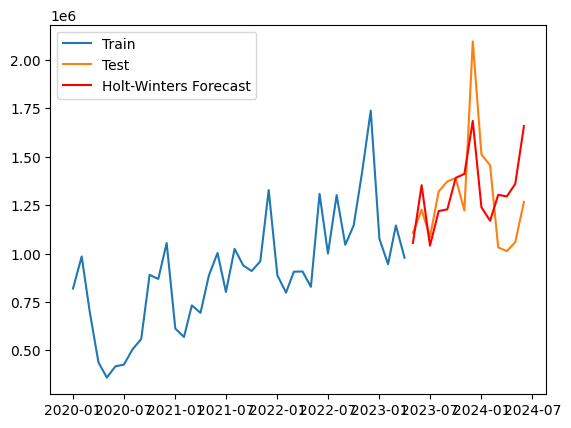

In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

df_geral_radio = pd.read_csv('../df_geral_radio.csv')
# Verificar se 'Data' já está definida como índice
if df_geral_radio.index.name != 'Data':
    df_geral_radio = df_geral_radio.set_index('Data')

# Selecionar a série temporal
y = df_geral_radio['Vl Liquido Final']

# Dividir os dados em treino e teste
train_size = int(len(y) * 0.75) 
train, test = y[:train_size], y[train_size:]

# Ajustar o modelo Holt-Winters
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Fazer previsões
y_pred = model_fit.forecast(len(test))

# Calcular o erro quadrático médio com viés
mse = mean_squared_error(test, y_pred)
print(f'Mean Squared Error {mse}')

# Converter índices para timestamps
train_index = pd.to_datetime(train.index)
test_index = pd.to_datetime(test.index)

# Plotar os resultados
plt.plot(train_index, train, label='Train')
plt.plot(test_index, test, label='Test')
plt.plot(test_index, y_pred, label='Holt-Winters Forecast', color='red')
plt.legend()

In [20]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(test, y_pred)
print(f'R^2: {r2}')

rmse = mean_squared_error(test, y_pred, squared=False)
print(f'RMSE: {rmse}')

mae= mean_absolute_error(test, y_pred)
print(f'MAE: {mae}')

R^2: 0.20943809749553743
RMSE: 240430.15891375326
MAE: 205250.72726434263


c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
